Homework 4 Spring 2023

Due Date - 04/19/2023, 11:59PM



# Name: Liang Hu
# UNI: lh3057


### PART-1: Neural Network from the scratch

For this part, you are not allowed to use any library other than numpy.

In this part, you will will implement the forward pass and backward pass (i.e. the derivates of each parameter wrt to the loss) with the network image uploaded

The weight matrix for the hidden layer is W1 and has bias b1.

The weight matrix for the ouput layer is W2 and has bias b2.

Activatation function is sigmoid for both hidden and output layer

Loss function is the MSE loss

Refer to the below dictionary for dimensions for each matrix

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pprint 
pp = pprint.PrettyPrinter(indent=4)
import warnings
warnings.filterwarnings("ignore")

In [57]:
np.random.seed(0) # don't change this

weights = {
    'W1': np.random.randn(3, 2),
    'b1': np.zeros(3),
    'W2': np.random.randn(3),
    'b2': 0,
}
X = np.random.rand(1000,2)
Y = np.random.randint(low=0, high=2, size=(1000,))

In [49]:
#Sigmoid Function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [52]:
def forward_propagation(X, weights):
    # Z1 -> output of the hidden layer before applying activation
    # H -> output of the hidden layer after applying activation
    # Z2 -> output of the final layer before applying activation
    # Y -> output of the final layer after applying activation
    
    Z1 = np.dot(X, weights['W1'].T) + weights['b1']
    H = sigmoid(Z1)
    
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)

    return Y, Z2, H, Z1


In [58]:
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.sum(dLdZ2)
    dLdH = np.dot(dLdZ2, weights['W2'])
    dHdZ1 = sigmoid(Z1) * (1 - sigmoid(Z1))
    dLdZ1 = np.multiply(dLdH, dHdZ1)
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.sum(dLdZ1, axis=0)
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L


In [60]:
def back_propagation(X, Y_T, weights):
    N_points = X.shape[0]
    
    # forward propagation
    Y, Z2, H, Z1 = forward_propagation(X, weights)
    L = (1/(2*N_points)) * np.sum(np.square(Y - Y_T))
    
    # back propagation
    dLdY = 1/N_points * (Y - Y_T)
    dLdZ2 = np.multiply(dLdY, (sigmoid(Z2)*(1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2.reshape(N_points, 1))
    dLdb2 = np.sum(dLdZ2, axis=0)
    
    dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, 3))
    dLdZ1 = np.multiply(dLdH, (sigmoid(Z1)*(1-sigmoid(Z1))))
    dLdW1 = np.dot(X.T, dLdZ1)
    dLdb1 = np.sum(dLdZ1, axis=0)
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    
    return gradients, L


In [61]:
gradients, L = back_propagation(X, Y, weights)
print(L)

0.1332476222330792


In [62]:
pp.pprint(gradients)

{   'W1': array([[ 0.00244596, -0.00030765, -0.00034768],
       [ 0.00262019, -0.00024188, -0.000372  ]]),
    'W2': array([[0.02216011],
       [0.02433097],
       [0.01797174]]),
    'b1': array([ 0.00492577, -0.00058023, -0.00065977]),
    'b2': 0.029249230265318685}


Your answers should be close to L = 0.133 and 'b1': array([ 0.00492, -0.000581, -0.00066])

# PART 2 MNIST Dataset

Description: The MNIST dataset is a widely-used benchmark dataset in the field of machine learning and computer vision. It consists of 70,000 grayscale images of handwritten digits (0-9), with 60,000 images in the training set and 10,000 images in the test set. The images are 28x28 pixels in size, and each pixel is represented by an integer value between 0 and 255, with 0 representing a white pixel and 255 representing a black pixel.

In [3]:
from tensorflow.keras.datasets import mnist

# The MNIST dataset and the labels have been provided for you
(x_dev, y_dev), (x_test, y_test) = mnist.load_data()


In [4]:
LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

2.1 Plot 5 samples from each class/label from train set on a 10*5 subplot

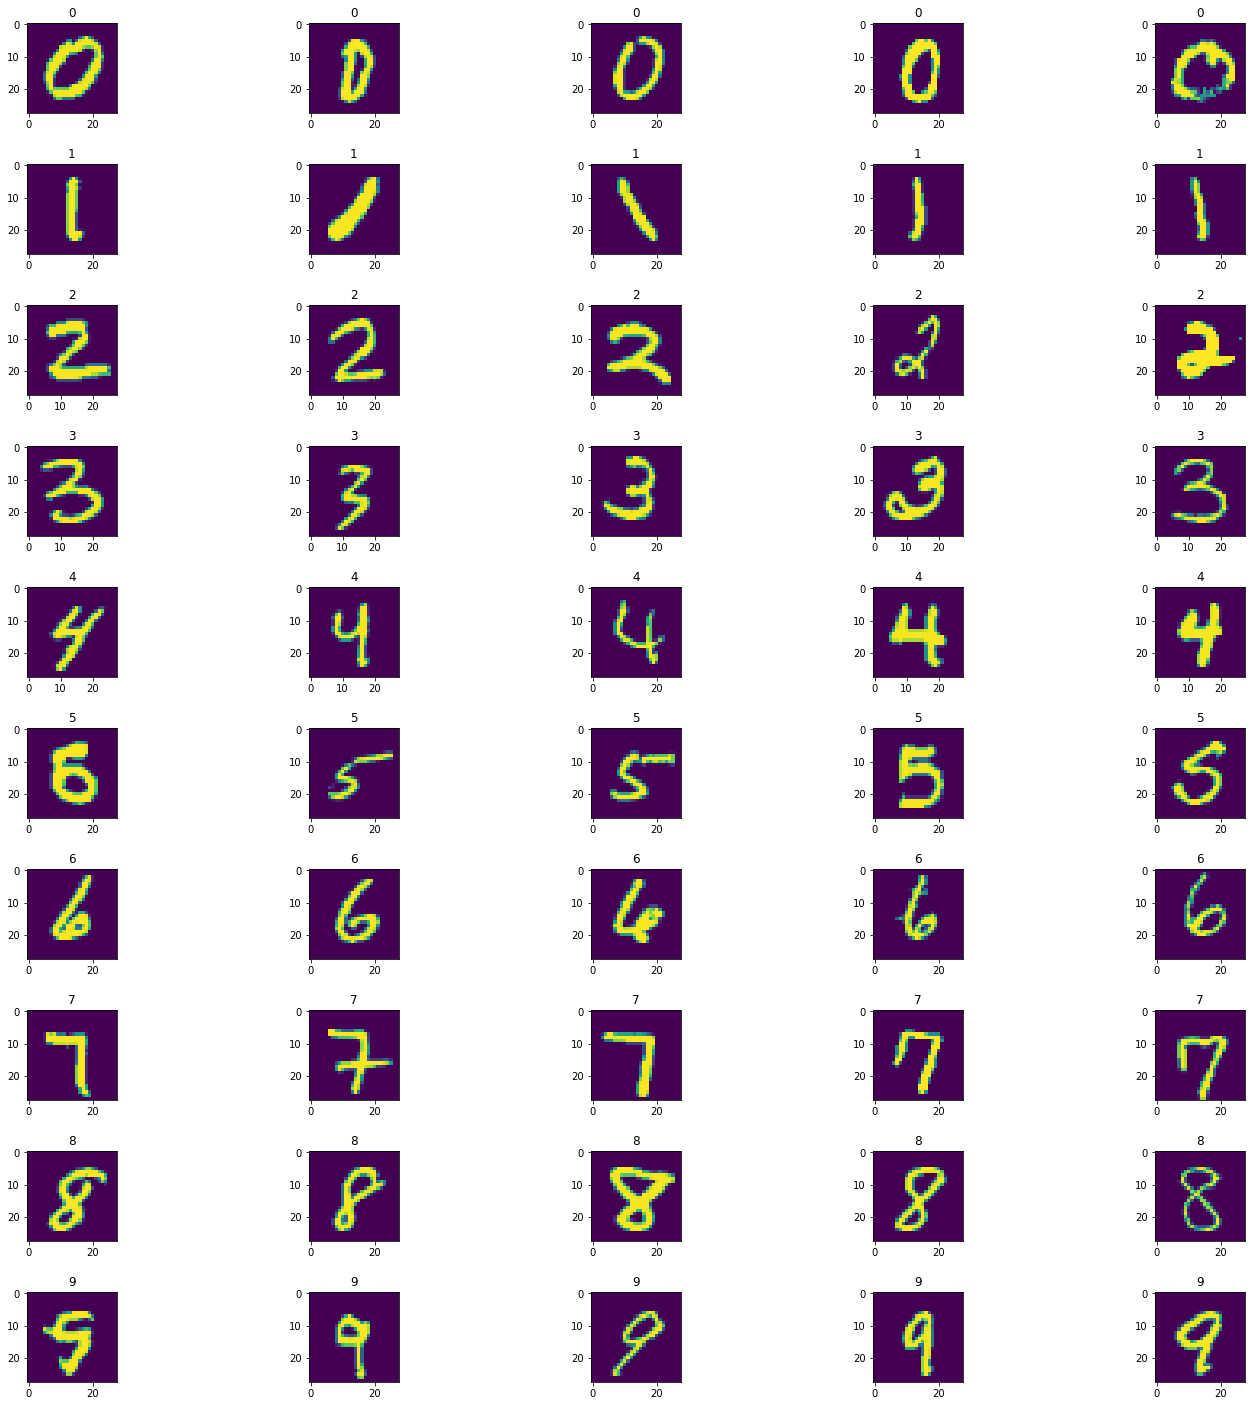

In [10]:
#Your code here
import random
fig,axs = plt.subplots(10,5,figsize=(20,20))
fig.tight_layout(pad=3)
for i in range(10):
    target_list = np.where(y_dev==i)[0]
    index = random.choices(list(target_list),k=5)
    x_dev_list = x_dev[index]
    
    for j in range(5):
        image = x_dev_list[j]
        axs[i,j].imshow(image)
        axs[i,j].set_title(LABELS[i])

2.2  Preparing the dataset


1) Print the shapes - $x_{dev}, y_{dev},x_{test},y_{test}$

2) Flatten the images into one-dimensional vectors and again print the shapes of $x_{dev}$,$x_{test}$

3) Standardize the development and test sets.

4) Train-test split your development set into train and validation sets (8:2 ratio).

In [11]:
#Your code here
print(f"The shape of x_dev is {x_dev.shape}")
print(f"The shape of y_dev is {y_dev.shape}")
print(f"The shape of x_test is {x_test.shape}")
print(f"The shape of y_test is {y_test.shape}")

The shape of x_dev is (60000, 28, 28)
The shape of y_dev is (60000,)
The shape of x_test is (10000, 28, 28)
The shape of y_test is (10000,)


In [12]:
x_dev_rs = x_dev.reshape(x_dev.shape[0], -1)
x_test_rs = x_test.reshape(x_test.shape[0], -1)
print(f"The shape of x_dev is {x_dev_rs.shape}")
print(f"The shape of x_test is {x_test_rs.shape}")


The shape of x_dev is (60000, 784)
The shape of x_test is (10000, 784)


In [13]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_dev_std = ss.fit_transform(x_dev_rs)
x_test_std = ss.fit_transform(x_test_rs)

In [14]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
y_dev_tc = to_categorical(y_dev,10)
y_test_tc = to_categorical(y_test,10)
x_train, x_val, y_train, y_val = train_test_split(x_dev_std,y_dev_tc,test_size=0.2)

Using TensorFlow backend.


2.3 Build the feed forward network 

First hidden layer size - 128

Second hidden layer size - 64

Third and last layer size - You should know this


In [20]:
#Your code here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import layers
model = Sequential([
    layers.Dense(128, input_shape=(784,), activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax'),
])

2.3.1) Comment briefly on importance of activation functions used.

It produces a probability distribution over the classes, which allows the model to make probabilistic predictions for each class. This is useful because it provides a measure of confidence in the model's predictions, and can be used to estimate the uncertainty in the model's predictions.

2.4) Print out the model summary

In [22]:
#Your code here
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


2.5) Do you think this number is dependent on the image height and width? 

Yes, I do. If the image height and width were to change, the number of input features would also change accordingly. For example, if the images were resized to 32 by 32 pixels, the number of input features would be 1024.
The number of classes is represented in the last layer. The distinct items can be seen in the images. So the  number is greater if the pattern is complex.

2.6) Use the right metric and  the right loss function and batch size, with Adam as the optimizer, train your model for 10 epochs .

In [23]:
#Your code here
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
history_callback = model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 58us/sample - loss: 0.2972 - accuracy: 0.9115 - val_loss: 0.1774 - val_accuracy: 0.9514
Epoch 2/10
48000/48000 [==============================] - 4s 76us/sample - loss: 0.1122 - accuracy: 0.9660 - val_loss: 0.1424 - val_accuracy: 0.9621
Epoch 3/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.0721 - accuracy: 0.9779 - val_loss: 0.1366 - val_accuracy: 0.9650
Epoch 4/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.0489 - accuracy: 0.9851 - val_loss: 0.1337 - val_accuracy: 0.9687
Epoch 5/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.0364 - accuracy: 0.9891 - val_loss: 0.1365 - val_accuracy: 0.9688
Epoch 6/10
48000/48000 [==============================] - 2s 49us/sample - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.1407 - val_accuracy: 0.9693
Epoch 7/10
48000/48000 [==============================] 

2.7) Plot a separate plots for:

a. displaying train vs validation loss over each epoch

b. displaying train vs validation accuracy over each epoch 

In [24]:
import pandas as pd

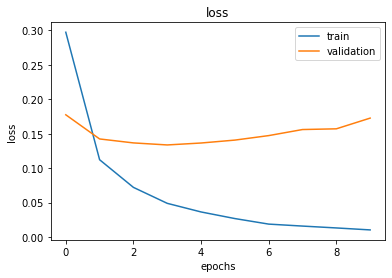

In [25]:
hist_cnn=pd.DataFrame(history_callback.history)
plt.plot(hist_cnn.index,hist_cnn["loss"])
plt.plot(hist_cnn.index,hist_cnn["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss")
plt.legend(["train","validation"])
plt.show()

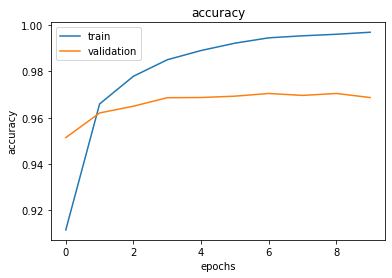

In [26]:
plt.plot(hist_cnn.index,hist_cnn["accuracy"])
plt.plot(hist_cnn.index,hist_cnn["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend(["train","validation"])
plt.show()

2.8) Finally, report the metric chosen on test set

In [27]:
#Your code here
score = model.evaluate(x_test_std,y_test_tc,verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test accuracy: {:.3f}".format(score[1]))

Test loss: 0.156
Test accuracy: 0.969


2.9 Plot the first 50 samples of test dataset on a 10*5 subplot and this time label the images with both the ground truth (GT) and predicted class (P).

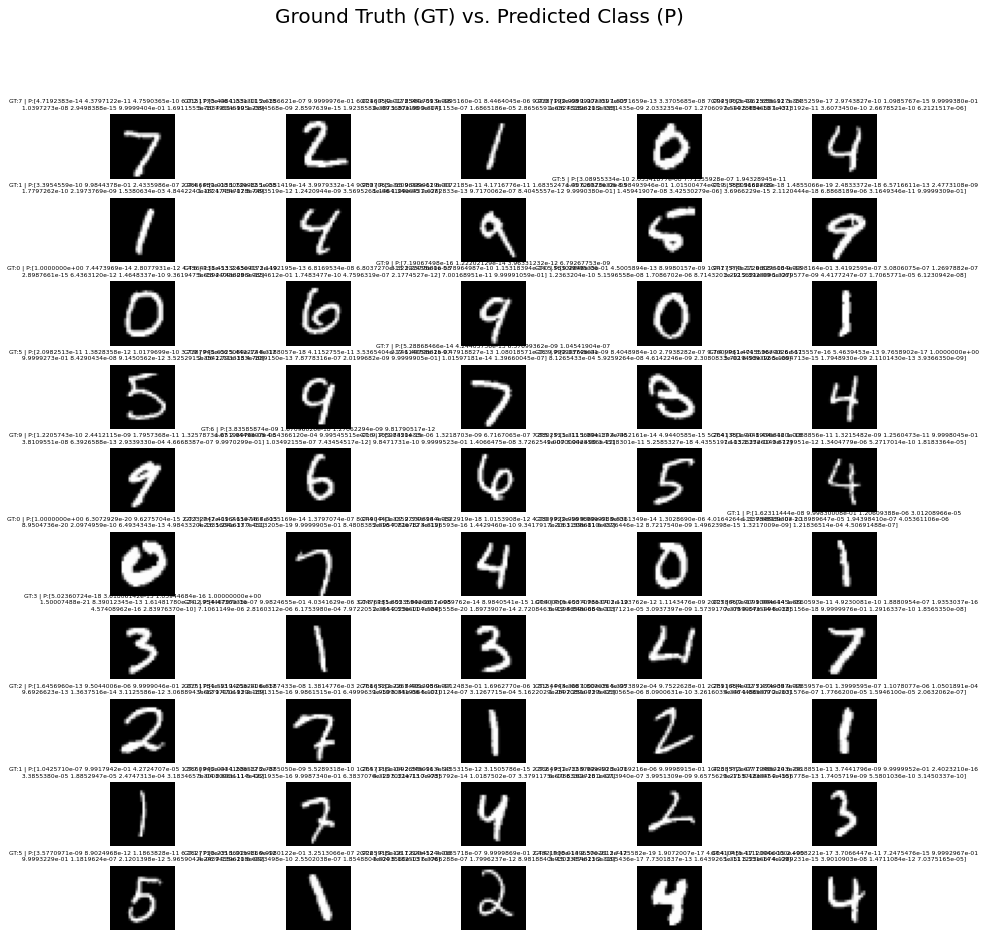

In [40]:
import matplotlib.pyplot as plt

# Get the predicted classes for the test set
y_pred = model.predict(x_test_std[:50])

# Plot the first 50 samples of the test set
fig, ax = plt.subplots(10, 5, figsize=(15, 15))
fig.suptitle('Ground Truth (GT) vs. Predicted Class (P)', fontsize=20)

for i in range(10):
    for j in range(5):
        idx = i*5 + j
        ax[i, j].imshow(x_test[idx], cmap='gray')
        ax[i, j].set_title(f"GT:{y_test[idx]} | P:{y_pred[idx]}", fontsize=6)
        ax[i, j].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Show the plot
plt.show()
